<a href="https://colab.research.google.com/github/ladeiraA/Lab_BigData/blob/main/Aula_RegrecaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
base = pd.read_csv ("/content/Advertising.csv")
print(base.describe)
base

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


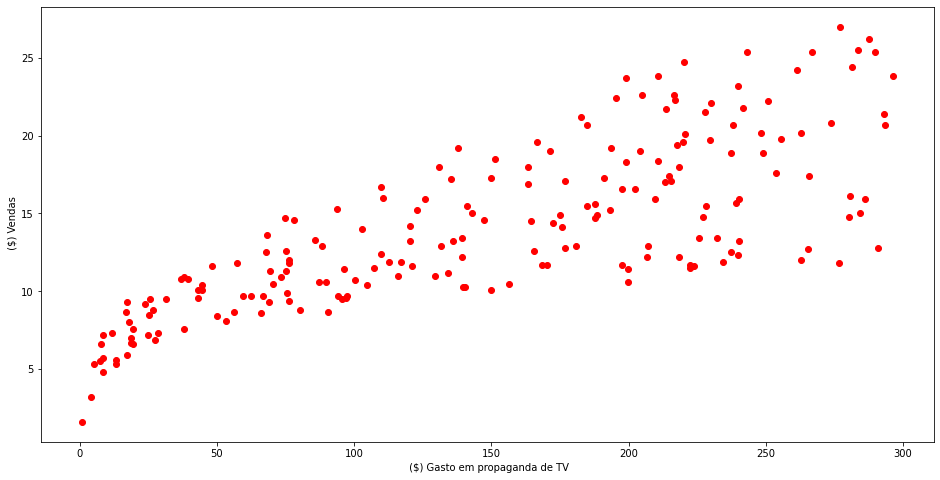

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    base['TV'],
    base['sales'],
    c = 'red')
plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [ ]:
x = base['TV'].values.reshape(-1,1)
y = base['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)
print("O modelo é Vendas = {:.5} + {:.5}x ".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é Vendas = 7.0326 + 0.047537x 


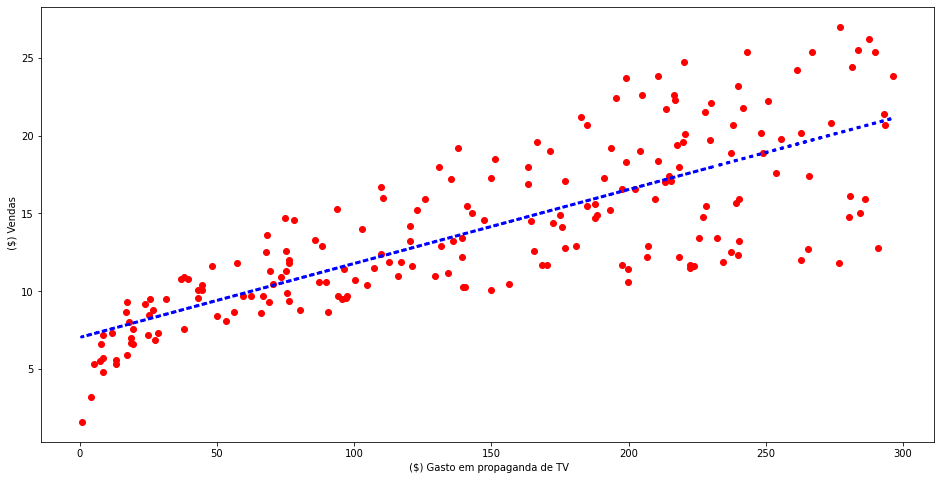

In [ ]:
f_previsoes = reg.predict(x)

plt.figure(figsize = (16,8))
plt.scatter(
    base['TV'],
    base['sales'],
    c = 'red')
plt.plot(
    base['TV'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle =':'
)
plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [ ]:
x = base['TV']
y = base['sales']
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        17:35:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
xs = base.drop(['sales', 'Unnamed: 0'], axis =1)
y = base['sales'].values.reshape(-1,1)
rl = LinearRegression()
rl.fit(xs, y)

print("O modelo é: Vendas = {:.5} + {:.5}*radio + {:.5}*newpaper".format(rl.intercept_[0], rl.coef_[0][0], rl.coef_[0][2]))


O modelo é: Vendas = 2.9389 + 0.045765*radio + -0.0010375*newpaper


In [ ]:
x =np.column_stack((base['TV'], base['radio'], base['newspaper']))
y= base['sales']

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        17:35:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0